In [2]:
from fastai.structured import *
from fastai.column_data import *
from IPython.display import HTML
import time
np.set_printoptions(threshold=50, edgeitems=20)

# DATA PREPARATION

In [6]:
table = pd.read_csv("positionData.csv", low_memory=False)

In [7]:
from IPython.display import HTML
display(table.head())

,TOPchampId,TOPkeyRune,TOPspell1,TOPspell2,JNGchampId,JNGkeyRune,JNGspell1,JNGspell2,MIDchampId,MIDkeyRune,MIDspell1,MIDspell2,ADCchampId,ADCkeyRune,ADCspell1,ADCspell2,SUPchampId,SUPkeyRune,SUPspell1,SUPspell2
0,19,2,4,5,56,4,4,9,18,3,4,0,118,0,4,7,34,14,4,5
1,0,13,4,0,54,4,4,9,139,7,4,5,47,0,4,7,10,4,4,5
2,43,2,4,0,36,5,6,9,131,8,4,0,64,0,4,0,74,7,4,5
3,93,2,4,0,42,4,4,9,29,4,4,5,21,2,4,7,12,8,4,5
4,58,2,4,0,79,6,4,9,117,8,4,5,45,3,4,7,140,8,4,5


In [10]:
display(pd.DataFrame.describe(table))

,TOPchampId,TOPkeyRune,TOPspell1,TOPspell2,JNGchampId,JNGkeyRune,JNGspell1,JNGspell2,MIDchampId,MIDkeyRune,MIDspell1,MIDspell2,ADCchampId,ADCkeyRune,ADCspell1,ADCspell2,SUPchampId,SUPkeyRune,SUPspell1,SUPspell2
count,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000,37946.000000
mean,57.898013,6.277579,3.976836,0.699072,70.708006,3.788805,4.040610,8.988299,79.945686,5.729985,3.996363,3.770595,65.527592,4.209956,3.998972,3.691061,66.787672,9.745349,3.997681,4.634217
std,38.298347,4.763212,0.313387,1.789139,35.467094,3.517797,0.275614,0.299813,45.349979,2.816370,0.119460,2.433536,38.042908,4.055135,0.066729,3.399834,38.945988,3.696413,0.092090,1.359475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,2.000000,4.000000,0.000000,36.000000,1.000000,4.000000,9.000000,39.000000,4.000000,4.000000,1.000000,39.000000,0.000000,4.000000,0.000000,27.000000,7.000000,4.000000,5.000000
50%,44.000000,4.000000,4.000000,0.000000,70.000000,4.000000,4.000000,9.000000,82.000000,4.000000,4.000000,5.000000,64.000000,3.000000,4.000000,5.000000,74.000000,8.000000,4.000000,5.000000
75%,91.000000,12.000000,4.000000,0.000000,97.000000,4.000000,4.000000,9.000000,126.000000,8.000000,4.000000,5.000000,106.000000,8.000000,4.000000,7.000000,88.000000,14.000000,4.000000,5.000000
max,140.000000,16.000000,6.000000,9.000000,139.000000,16.000000,7.000000,9.000000,140.000000,16.000000,7.000000,9.000000,140.000000,16.000000,6.000000,9.000000,140.000000,16.000000,7.000000,9.000000


In [126]:
cat_vars = ["TOPchampId", "TOPkeyRune", "TOPspell1", "TOPspell2", "JNGchampId", "JNGkeyRune", "JNGspell1", "JNGspell2", 
            "MIDchampId", "MIDkeyRune", "MIDspell1", "MIDspell2", "ADCchampId", "ADCkeyRune", "ADCspell1", "ADCspell2", 
            "SUPchampId", "SUPkeyRune", "SUPspell1", "SUPspell2"]
len(table)

37946

In [36]:
#df, y, nas, mapper = proc_df(table, do_scale=True)
#yl = np.log(y)
print(len(table))
table.head()

37946


,TOPchampId,TOPkeyRune,TOPspell1,TOPspell2,JNGchampId,JNGkeyRune,JNGspell1,JNGspell2,MIDchampId,MIDkeyRune,MIDspell1,MIDspell2,ADCchampId,ADCkeyRune,ADCspell1,ADCspell2,SUPchampId,SUPkeyRune,SUPspell1,SUPspell2
0,19,2,4,5,56,4,4,9,18,3,4,0,118,0,4,7,34,14,4,5
1,0,13,4,0,54,4,4,9,139,7,4,5,47,0,4,7,10,4,4,5
2,43,2,4,0,36,5,6,9,131,8,4,0,64,0,4,0,74,7,4,5
3,93,2,4,0,42,4,4,9,29,4,4,5,21,2,4,7,12,8,4,5
4,58,2,4,0,79,6,4,9,117,8,4,5,45,3,4,7,140,8,4,5


In [101]:
b = time.time()

perms = np.array(list(itertools.permutations([0, 1, 2, 3, 4])))
y_cac = np.array([[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]])

x = np.zeros((len(table)*120, 20))
y = np.zeros((len(table)*120, 25))

for i in range(len(table)):
    x_cac = np.array([table.iloc[i,0:4], table.iloc[i,4:8], table.iloc[i,8:12], table.iloc[i,12:16], table.iloc[i,16:20]])
         
    for perm in range(len(perms)):
        
        for e in range(len(perms[perm])):
            x[i*120+perm][4*e:4*(e+1)] = x_cac[perms[perm][e]]
            y[i*120+perm][5*e:5*(e+1)] = y_cac[perms[perm][e]]

print(time.time()-b)

147.1563754081726


In [102]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [114]:
b = time.time()
x, y = unison_shuffled_copies(x, y)
print(time.time()-b)

2.3582046031951904


In [122]:
print(x[0], y[0])

[ 74.   7.   4.   0. 134.  13.   4.   0.  23.   4.   4.   9.  75.   7.   4.   5. 136.   4.   4.   5.] [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]


In [117]:
train_ratio = 0.75
train_size = int(len(x) * train_ratio) # amount of training samples
val_idx = list(range(train_size, len(x))) # list with the indices of the validation samples

In [134]:
x = pd.DataFrame(x, columns=cat_vars)
for v in cat_vars: x[v] = x[v].astype('category').cat.as_ordered()

# DEEP LEARNING

In [142]:
def logloss(true_label, predicted, eps=1e-15):
  p = np.clip(predicted, eps, 1 - eps)
  if true_label == 1:
    return -log(p)
  else:
    return -log(1 - p)
y_range = (0, 1)

In [143]:
data = ColumnarModelData.from_data_frame("weights/", val_idx, x, y.astype(np.float32), cat_flds=cat_vars, bs=128)

In [144]:
cat_sz = [(c, len(x[c].cat.categories)+1) for c in cat_vars]

In [145]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [146]:
emb_szs

[(142, 50),
 (18, 9),
 (8, 4),
 (9, 5),
 (142, 50),
 (18, 9),
 (8, 4),
 (9, 5),
 (142, 50),
 (18, 9),
 (8, 4),
 (9, 5),
 (142, 50),
 (18, 9),
 (8, 4),
 (9, 5),
 (142, 50),
 (18, 9),
 (8, 4),
 (9, 5)]

In [147]:
#size of the embeddings, number of cont vars, embedding dropout, size of the last layer, size of hidden layers, dropout of hidden layers, y range
model = data.get_learner(emb_szs, 0, 0.04, 25, [250], [0.01], y_range=y_range, crit=logloss)
lr = 1e-3

C:\Users\klein\Anaconda3\envs\fastai\lib\site-packages\torch\cuda\__init__.py:116: UserWarning: 
    Found GPU0 GeForce GTX 770 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


In [149]:
model.lr_find()

  0%|                                                                                        | 0/26681 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (48) : no kernel image is available for execution on the device at C:/Anaconda2/conda-bld/pytorch_1519501749874/work/torch/lib/THC/THCTensorCopy.cu:204

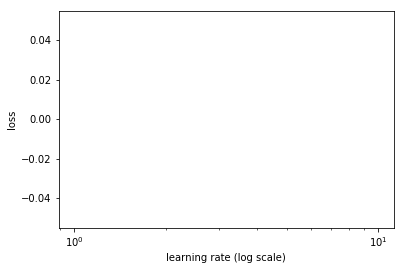

In [150]:
model.sched.plot(100)

In [151]:
model = data.get_learner(emb_szs, 0, 0.04, 25, [250], [0.01], y_range=y_range, crit=logloss)
lr = 1e-3

NameError: name 'm' is not defined

In [ ]:
#training set error, validation set error, metric
model.fit(lr, 3, metrics=[logloss])

In [ ]:
model.fit(lr, 5, metrics=[logloss], cycle_len=1)

In [ ]:
model.fit(lr, 2, metrics=[logloss], cycle_len=4)